# Problem Statement
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.
Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.
With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, need to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

EDA

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from time import time
import re

# NLP Libraries
import sklearn
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import collections
from sklearn.feature_extraction.text import TfidfVectorizer

import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [3]:
# reading data
df= pd.read_csv("sample30.csv", parse_dates=False)

In [4]:
# displaying the first few rows of dataset
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [5]:
# Shape of the data
df.shape

(30000, 15)

In [6]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [7]:
# Columns types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

<AxesSubplot:>

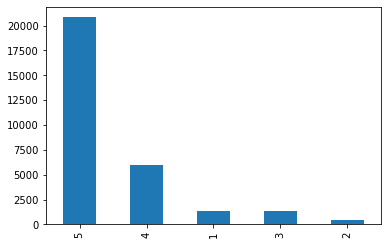

In [8]:
df['reviews_rating'].value_counts().plot(kind='bar')

#### From above graph we can conclude that most people are somehow satisfied with the products offered at Ebuss

True     0.862667
False    0.051667
Name: reviews_doRecommend, dtype: float64


<AxesSubplot:>

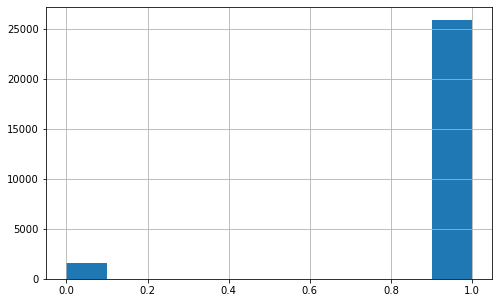

In [9]:
# Let see how people have recommended the products
print(df["reviews_doRecommend"].value_counts()/len(df))
df["reviews_doRecommend"].astype(float).hist(figsize=(8,5))

#### This also gives a good understanding that people are satified with product and recommened.

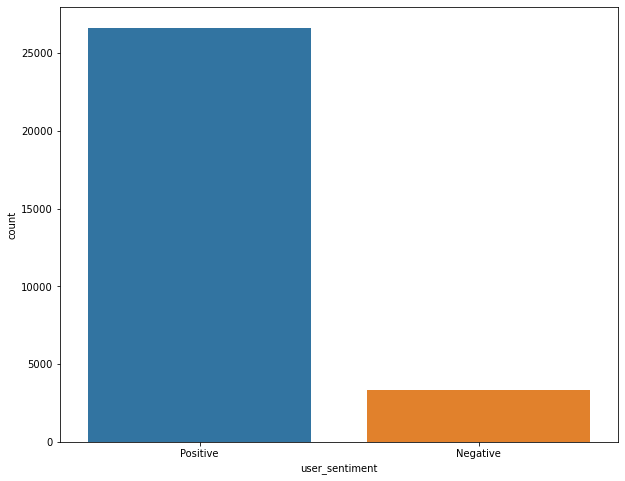

In [10]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='user_sentiment', data=df)

In [11]:
## User sentisent also shows positive response on Ebuss products

In [11]:
# percentage of missing data in each columns
round(100*(df.isnull().sum()/len(df.index)), 2)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

In [12]:
# reviews_userCity and reviews_userProvince has more than 90 percent columns NAN, so dropping those columns
df=df.drop(["reviews_userCity","reviews_userProvince"],axis=1)

In [13]:
## Create a new dataframe to have not null review_date features
df1 = df[~df.reviews_date.isna()]

In [14]:
df1['year'] = df1['reviews_date'].apply(lambda x:x[:4])

In [15]:
df1.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,2012
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,2017


<AxesSubplot:>

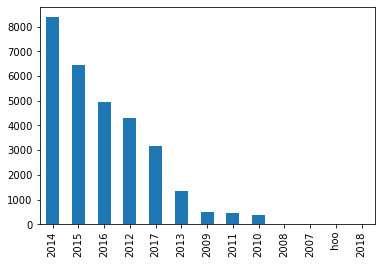

In [16]:
df1['year'].value_counts().plot(kind='bar')

In [17]:
## review date gives us information like in 2014 people reviewed more and there is drop in review any products.
# Or the dataset having records more from that year

In [18]:
# lets check how many brands are available in provided dataset
df['brand'].unique()

array(['Universal Music', 'Lundberg', 'K-Y', 'J.R. Watkins', 'AMBI',
       "Johnson's", 'Olay', 'Windex', 'Heinz', 'KIND', 'Pantene',
       'Aussie', 'Disney', 'CeraVe', 'Solo Foods', 'Finish',
       'Jake And The Neverland Pirates', 'Pearhead', 'No Brand',
       'Neutrogena', 'Meguiars', 'Banana Boat', 'Cetaphil', 'Suave',
       'Bumble Bee', 'Citrus Magic', 'La Tortilla Factory',
       'Target.com Use Only', 'Sea Gull Lighting', 'The Seaweed Bath Co.',
       'Way Basics', 'Biokleen', 'Yes to Carrots', 'Alberto VO5',
       'Warner Bros.', 'FOX', 'Progresso', "Herr's", 'Hawaiian Punch',
       'Moom', 'Universal Home Video', 'Holmes', 'Sony Music', 'Beanitos',
       'Baxton Studio', "Nature's Path", 'Lite Source',
       'SLOAN VALVE COMPANY', 'Nearly Natural', 'Toy Story', 'MaraNatha',
       'Chex', 'TRESemme', 'Wagan', 'Creme Of Nature', 'Arrid',
       'Eagle Brand', 'Pinaud', 'Hortense B. Hewitt', 'Canada Dry',
       'Baxter of California', 'Ragu', 'Sabra', 'Pendaflex',


In [19]:
## There are lots of brands, lets check top 10 brands customers has purchased and reviewed
df.groupby('brand')['brand'].count().sort_values(ascending=False)

brand
Clorox                            10585
Warner Home Video                  3325
Disney                             1200
L'oreal Paris                      1186
FOX                                 887
                                  ...  
Kenroy Home                           1
Jake And The Neverland Pirates        1
JNH Lifestyles                        1
SLOAN VALVE COMPANY                   1
iStarUSA                              1
Name: brand, Length: 214, dtype: int64

In [20]:
## Clorox, Warner Home Video, Disney, L'oreal Paris,FOX are the tops brand products customer has purchased

In [21]:
## let check top 10 products from which brand are customer choice

In [22]:
df.groupby('brand')['name'].value_counts().sort_values(ascending=False).head(10)

brand                 name                                                                          
Clorox                Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8545
Warner Home Video     Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3325
Clorox                Clorox Disinfecting Bathroom Cleaner                                              2039
L'oreal Paris         L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1186
Disney                Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1143
Burt's Bees           Burt's Bees Lip Shimmer, Raisin                                                    873
Sony Pictures         The Resident Evil Collection 5 Discs (blu-Ray)                                     845
FOX                   Mike Dave Need Wedding Dates (dvd + Digital)                                       757
Nexxus                Nexxu

In [23]:
# in manufacturer there are .47% missing
df[df['manufacturer'].isnull()].head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
22210,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2013-03-05T00:00:00.000Z,NaN,False,1,I have read the entire Alex Cross series and I...,Disappointing casting,poorcrossing,Negative
22211,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2013-10-11T00:00:00.000Z,NaN,False,1,Idris Elba was originally cast in the lead rol...,Atrocious casting,naberios,Positive
22212,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2017-06-11T00:00:00.000Z,NaN,False,2,I was way more excited or this movie than I sh...,Meh,jz30,Positive


In [24]:
df[df['manufacturer'].isnull()]['brand'].drop_duplicates()

22210    Summit Entertainment
Name: brand, dtype: object

In [27]:
# from above we can see that Summit Entertainment Brand has the column of manufacturer missing. We can impute the column of manufacturer corresponding to Summit Entertainment with the same
df.manufacturer.fillna(df.brand,inplace= True)

In [28]:
### Let see top manufacturers for each brand
df.groupby('brand')['manufacturer'].value_counts().sort_values(ascending=False).head(10)

brand                 manufacturer          
Clorox                Clorox                    8546
Warner Home Video     Test                      3325
Clorox                AmazonUs/CLOO7            2039
L'oreal Paris         L'oreal Paris             1186
Disney                Walt Disney               1143
Burt's Bees           Burt's Bees                873
Sony Pictures         SONY CORP                  845
Summit Entertainment  Summit Entertainment       813
FOX                   Twentieth Century Fox      757
Nexxus                Nexxus Beauty Products     693
Name: manufacturer, dtype: int64

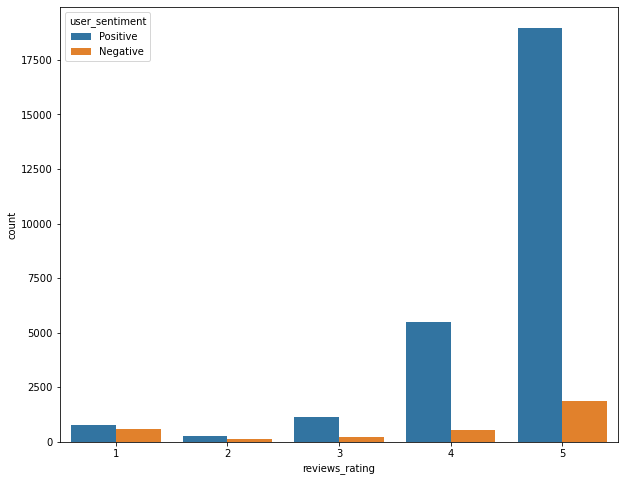

In [29]:
## lets see how rating and user sentiment are in sync or it differs
plt.figure(figsize=(10,8))
ax = sns.countplot(x='reviews_rating', hue="user_sentiment", data=df)

#### looking at rating and user sentiment, i don't feels they are in sync as customer gave rating 5 but those records are considered as negative .
We need to create the sentiment using rating for each products

In [30]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


In [32]:
# lets see reveiws_usename, so a user have multiple times reviewed the products
df["reviews_username"].value_counts()

mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
                     ..
cutee1                1
barbarian407          1
rita8145              1
byndgirl              1
beckee                1
Name: reviews_username, Length: 24914, dtype: int64

In [33]:
# Rating count given for the product
rating_per_product = df.groupby(by='id')['reviews_rating'].count().sort_values(ascending=False)
df.groupby(by='id')['reviews_rating'].count().sort_values(ascending=False)

id
AVpf3VOfilAPnD_xjpun    8545
AVpfPaoqLJeJML435Xk9    3325
AVpfJP1C1cnluZ0-e3Xy    2039
AVpfW8y_LJeJML437ySW    1186
AVpfRTh1ilAPnD_xYic2    1143
                        ... 
AVpfF7k8ilAPnD_xUyWf       1
AVpfErGsLJeJML431yRX       1
AVpfDflP1cnluZ0-c5RJ       1
AVpfBuqY1cnluZ0-cTBI       1
AVpfDbSP1cnluZ0-c3wo       1
Name: reviews_rating, Length: 271, dtype: int64

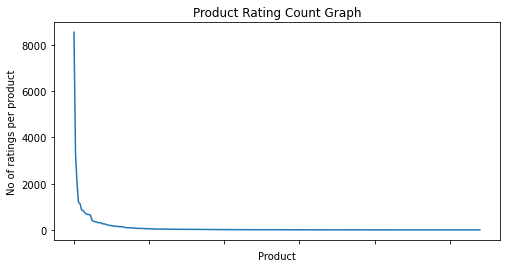

In [34]:
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(rating_per_product.values)
plt.title('Product Rating Count Graph')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

<AxesSubplot:xlabel='id'>

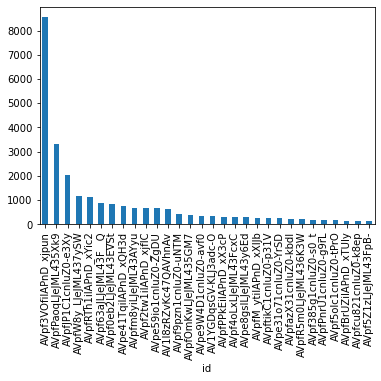

In [35]:
rating_per_product.head(30).plot(kind= "bar")

In [36]:
## there are many product which having very less rating and that product will not be recommended by model as not having much data for modelling
## Just keeping those records to increase the corpus

In [37]:
# Lets see how review_text & review_title column
df["reviews_text"].head()

0    i love this album. it's very good. more to the...
1    Good flavor. This review was collected as part...
2                                         Good flavor.
3    I read through the reviews on here before look...
4    My husband bought this gel for us. The gel cau...
Name: reviews_text, dtype: object

In [38]:
df["reviews_title"].head()

0    Just Awesome
1            Good
2            Good
3    Disappointed
4      Irritation
Name: reviews_title, dtype: object

In [39]:
df["reviews_text"]=df["reviews_text"].astype('str')
df["reviews_title"]=df["reviews_title"].astype('str')

In [40]:
## Max and Min length of reviews_text
print(max(len(i) for i in df.reviews_text))
print(min(len(i) for i in df.reviews_text))

5865
2


In [41]:
## Max and Min length of reviews_title
print(max(len(i) for i in df.reviews_title))
print(min(len(i) for i in df.reviews_title))

180
1


In [42]:
## We should both columns for text processing, so creating a new column by concatenating both columns
df['text'] = [' '.join(i) for i in zip(df["reviews_text"].map(str),df["reviews_title"])]

In [43]:
df.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,i love this album. it's very good. more to the...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,Good flavor. This review was collected as part...


### Text Processing

#### Taking only features needed for modelling

In [44]:
df_txt = df[['reviews_username', 'name','text', 'reviews_rating']]

In [45]:
df_txt.head()

,reviews_username,name,text,reviews_rating
0,joshua,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,5
1,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,5
2,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. Good,5
3,rebecca,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,1
4,walker557,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,1


In [46]:
df_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviews_username  29937 non-null  object
 1   name              30000 non-null  object
 2   text              30000 non-null  object
 3   reviews_rating    30000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [47]:
round(100*(df_txt.isnull().sum()/len(df_txt.index)), 2)

reviews_username    0.21
name                0.00
text                0.00
reviews_rating      0.00
dtype: float64

In [48]:
#### there are few records missing with username, but for sentiment analysis modelling the username feature is not needed.

Product rating range from 1 to 5. As per EDA, the provided user_sentiment column is not in sync with rating, so creating
a sentiment feature as positive or negative based on rating
Rating greater than 3 consider as positive review & less then 3 set as negative review

In [49]:
df_txt['sentiment']=df_txt['reviews_rating'].apply(lambda x: 'Positive' if x >=3 else 'Negative')

In [50]:
df_txt.head()

,reviews_username,name,text,reviews_rating,sentiment
0,joshua,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,5,Positive
1,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,5,Positive
2,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. Good,5,Positive
3,rebecca,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,1,Negative
4,walker557,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,1,Negative


In [51]:
## droping all columns not needed for modelling

In [52]:
df_txt=df_txt.drop(["reviews_rating", "reviews_username", "name", "reviews_rating"],axis=1)

In [53]:
df_txt.head()

,text,sentiment
0,i love this album. it's very good. more to the...,Positive
1,Good flavor. This review was collected as part...,Positive
2,Good flavor. Good,Positive
3,I read through the reviews on here before look...,Negative
4,My husband bought this gel for us. The gel cau...,Negative


####  Lower Case

In [54]:
# function to lowercase the words
def words(sent):
    "Convert text to lower case and tokenise the document"
    return re.findall(r'\w+', sent.lower())

#### Text cleaning
lower case
remove integer
remove special characters
stop words
spell correction

In [55]:
def clean_text(text):
        
    # Convert words to lower case
    text = text.lower()
    corrected_words = []
    sent = []
    
    # Format words and remove unwanted characters   
    text = re.sub(r'\n', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'//', '', text)
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@$\[\]]', ' ', text)
    
    # Remove stop words
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    
    text = " ".join(text)
    
   # for w in text.split():
   #     corrected_words.append(TextBlob(w))
    
   # for i in corrected_words:
   #     sent.append(str(i.correct()))   
        
    #text = " ".join(sent)
    
    return text

In [56]:
# Clean the description
for row in df_txt.iterrows():
    row[1]['text'] = clean_text(row[1]['text'])

In [225]:
#clean_text("i love this album. it's very good. more to the")

'love album good'

In [57]:
df_txt.head()

,text,sentiment
0,love album good hip hop side current pop sound...,Positive
1,good flavor review collected part promotion good,Positive
2,good flavor good,Positive
3,read reviews looking buying one couples lubric...,Negative
4,husband bought gel us gel caused irritation fe...,Negative


In [58]:
## word corpus count
print('Unique words: {}'.format(len({word for desc in df_txt.text for word in desc.split()})))

Unique words: 19097


In [59]:
# Create the word vocab
import collections
words = [word for desc in df_txt.text for word in desc.split()]
word_counts = collections.Counter(words)

In [60]:
word_counts

Counter({'love': 11325,
         'album': 102,
         'good': 6793,
         'hip': 2,
         'hop': 2,
         'side': 191,
         'current': 43,
         'pop': 81,
         'sound': 187,
         'hype': 17,
         'listen': 46,
         'everyday': 551,
         'gym': 23,
         'give': 386,
         'star': 126,
         'rating': 33,
         'way': 1296,
         'metaphors': 1,
         'crazy': 118,
         'awesome': 1844,
         'flavor': 269,
         'review': 9239,
         'collected': 8745,
         'part': 9065,
         'promotion': 8747,
         'read': 156,
         'reviews': 229,
         'looking': 771,
         'buying': 314,
         'one': 3847,
         'couples': 4,
         'lubricants': 2,
         'ultimately': 10,
         'disappointed': 501,
         'even': 1403,
         'live': 314,
         'starters': 4,
         'neither': 15,
         'boyfriend': 32,
         'could': 824,
         'notice': 112,
         'sort': 54,
         'e

### Lemmatising

In [61]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemprocess(document):
    
    # tokenize into words
    words = word_tokenize(document)
    
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [62]:
df_txt.head()

,text,sentiment
0,love album good hip hop side current pop sound...,Positive
1,good flavor review collected part promotion good,Positive
2,good flavor good,Positive
3,read reviews looking buying one couples lubric...,Negative
4,husband bought gel us gel caused irritation fe...,Negative


In [63]:
df_txt["text"] = df_txt["text"].apply(lambda x: lemprocess(x))

In [64]:
df_txt.head()

,text,sentiment
0,love album good hip hop side current pop sound...,Positive
1,good flavor review collect part promotion good,Positive
2,good flavor good,Positive
3,read review look buy one couple lubricants ult...,Negative
4,husband buy gel us gel cause irritation felt l...,Negative


In [244]:
## After lemmitization, word are converted to base form
# like 4th index text word 'brought' change to its base form - 'buy'

In [66]:
!pip install wordcloud

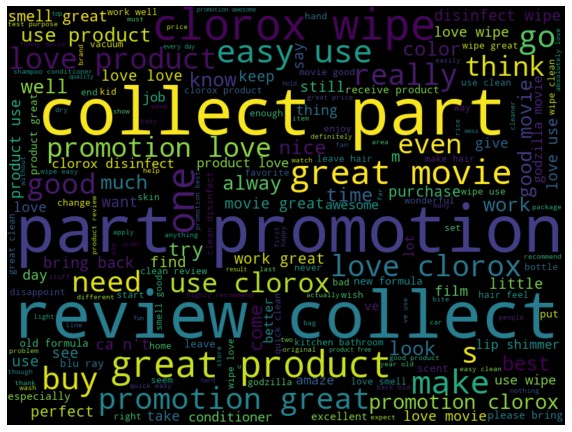

In [67]:
#let's form the word cloud
#A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes
all_words = ' '.join([text for text in df_txt['text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(all_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [68]:
df_txt["sentiment"].value_counts()

Positive    28196
Negative     1804
Name: sentiment, dtype: int64

#### TFIDF Vectorizer

In [69]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True, ngram_range=(1,1), min_df = 0.1) 
 
# vectorize the complete text
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_txt['text'])


In [70]:
(tfidf_vectorizer_vectors)

<30000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 124263 stored elements in Compressed Sparse Row format>

In [71]:
df_txt.head(2)

,text,sentiment
0,love album good hip hop side current pop sound...,Positive
1,good flavor review collect part promotion good,Positive


In [72]:
df['text'].head()

0    i love this album. it's very good. more to the...
1    Good flavor. This review was collected as part...
2                                    Good flavor. Good
3    I read through the reviews on here before look...
4    My husband bought this gel for us. The gel cau...
Name: text, dtype: object

In [73]:
df['text'] = df_txt['text']

In [ ]:
## saving the cleanup text in original dataset to use it during user interface.

In [74]:
df['text'].head()

0    love album good hip hop side current pop sound...
1       good flavor review collect part promotion good
2                                     good flavor good
3    read review look buy one couple lubricants ult...
4    husband buy gel us gel cause irritation felt l...
Name: text, dtype: object

### Creating pickle files for tdidf vectorizer and data for deployment

In [75]:
pkl.dump(tfidf_vectorizer_vectors, open("tfidf.pkl", "wb"))
pkl.dump(df, open("transform.pkl", "wb"))

In [76]:
#converting user_sentiment in binary form

df_txt["sentiment"]=df_txt["sentiment"].apply(lambda x: 1 if x =='Positive' else 0)

In [77]:
df_txt.head()

,text,sentiment
0,love album good hip hop side current pop sound...,1
1,good flavor review collect part promotion good,1
2,good flavor good,1
3,read review look buy one couple lubricants ult...,0
4,husband buy gel us gel cause irritation felt l...,0


### Model Building
We will build 3 models-
1.Logistic regression
2.Random Forest
3.XG Boost Classifier 

There is a imbalance is user_sentiment class, number of positives are more and number of negatives are less. We will require to handle class imbalance during/before modelling 



### SMOTE for class imbalance

In [78]:
#dividing data into test & train to build sentiment analysis model
# Putting feature variable to X
X = tfidf_vectorizer_vectors

# Putting response variable to y
y = df_txt["sentiment"]
# split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =100)

In [79]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (22500, 19)
Number transactions y_train dataset:  (22500,)
Number transactions X_test dataset:  (7500, 19)
Number transactions y_test dataset:  (7500,)


### SMOTE for class imbalance

In [80]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [81]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)


In [82]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ns.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ns.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ns == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ns == 0)))

Before OverSampling, counts of label '1': 21130
Before OverSampling, counts of label '0': 1370 

After OverSampling, the shape of train_X: (36917, 19)
After OverSampling, the shape of train_y: (36917,) 

After OverSampling, counts of label '1': 21100
After OverSampling, counts of label '0': 15817


### Training the model
## Random Forest

In [83]:
rf=RandomForestClassifier()
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [84]:
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 261  173]
 [ 847 6219]]
0.864
              precision    recall  f1-score   support

           0       0.24      0.60      0.34       434
           1       0.97      0.88      0.92      7066

    accuracy                           0.86      7500
   macro avg       0.60      0.74      0.63      7500
weighted avg       0.93      0.86      0.89      7500



### Random Forest has a good accuracy score of 86%

No handles with labels found to put in legend.


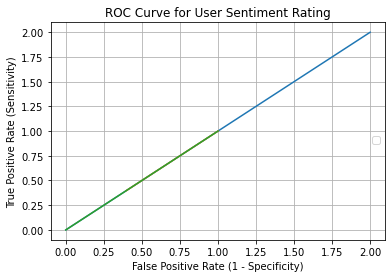

<Figure size 432x288 with 0 Axes>

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve
plt.plot(roc_curve(y_test, y_pred), roc_curve(y_test, y_pred))
plt.title('ROC Curve for User Sentiment Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1.0, .5))
plt.figure() 
plt.show()

Let's hypertune Random forest using randomised search

In [86]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [303]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
## fit the randomized model
rf_randomcv.fit(X_train_ns,y_train_ns)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [304]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'entropy'}

In [305]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [306]:
best_random_grid=rf_randomcv.best_estimator_

In [307]:
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 264  170]
 [ 858 6208]]
Accuracy Score 0.8629333333333333
Classification report:               precision    recall  f1-score   support

           0       0.24      0.61      0.34       434
           1       0.97      0.88      0.92      7066

    accuracy                           0.86      7500
   macro avg       0.60      0.74      0.63      7500
weighted avg       0.93      0.86      0.89      7500



### Training the model
## Logistic Regression

In [87]:
lr = LogisticRegression()
lr.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [88]:
y_pred2=lr.predict(X_test)

print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))


[[ 334  100]
 [1325 5741]]
0.81
              precision    recall  f1-score   support

           0       0.20      0.77      0.32       434
           1       0.98      0.81      0.89      7066

    accuracy                           0.81      7500
   macro avg       0.59      0.79      0.60      7500
weighted avg       0.94      0.81      0.86      7500



### Training the model
## XGBoost Regression

In [90]:
xgb = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic')
xgb.fit(X_train_ns, y_train_ns)

[08:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
y_pred3 = xgb.predict(X_test)
predictions = [round(value) for value in y_pred3]

In [92]:
accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[ 292  142]
 [ 949 6117]]
0.8545333333333334
              precision    recall  f1-score   support

           0       0.24      0.67      0.35       434
           1       0.98      0.87      0.92      7066

    accuracy                           0.85      7500
   macro avg       0.61      0.77      0.63      7500
weighted avg       0.93      0.85      0.89      7500

Accuracy: 85.45%


## Among all the models tested for Sentiment analysis, Xgboost has performed the best in term of accuracy and performance.So, taking Xgboost as final model for sentiment analysis

In [93]:
pkl.dump(xgb, open('Xgboost.pkl', 'wb'))

# Recommendation system

### EDA already performed suring sentiment analysis to understand the data. For recommendation system, only rating column, product name and user name required, so directly performing User based recommendation and Item based recommendation

In [94]:
df=pd.read_csv("sample30.csv", usecols=['name', 'reviews_rating', 'reviews_username'])
df.head()

,name,reviews_rating,reviews_username
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,K-Y Love Sensuality Pleasure Gel,1,walker557


In [95]:
round(100*(df.isnull().sum()/len(df.index)),2)

name                0.00
reviews_rating      0.00
reviews_username    0.21
dtype: float64

In [96]:
## droping the records doesn't have username as username name is needed for any recommendation
df.dropna(subset=['reviews_username'], inplace=True)

In [97]:
df.dropna(subset=['name'], inplace=True)

In [98]:
df.shape

(29937, 3)

In [99]:
## Lets check any duplicate record per user for a product/name provided
df[df.duplicated(["name","reviews_username"])]

,name,reviews_rating,reviews_username
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
12,K-Y Love Sensuality Pleasure Gel,1,jds1992
44,"Johnson's Baby Bubble Bath and Wash, 15oz",4,solo
79,Olay Regenerist Deep Hydration Regenerating Cream,3,mylifeinheels
90,Olay Regenerist Deep Hydration Regenerating Cream,3,mylifeinheels
...,...,...,...
29807,L'or233al Paris Elvive Extraordinary Clay Reba...,5,joycakes
29827,L'or233al Paris Elvive Extraordinary Clay Reba...,5,emily95
29841,L'or233al Paris Elvive Extraordinary Clay Reba...,5,brookieboo1994
29921,L'or233al Paris Elvive Extraordinary Clay Reba...,5,talmariejohn


In [100]:
## A user have duplicate review for same product
df[df["reviews_username"] =="filo123"]

,name,reviews_rating,reviews_username
29668,L'or233al Paris Elvive Extraordinary Clay Reba...,5,filo123
29944,L'or233al Paris Elvive Extraordinary Clay Reba...,5,filo123


In [101]:
## Removing the duplicate records 
df.drop_duplicates(subset=["name","reviews_username"],inplace=True)
df.shape

(27588, 3)

### Dividing the dataset into train and test

In [102]:
# Test and Train split of the dataset.
train, test = train_test_split(df, test_size=0.30, random_state=31)

In [103]:
print(train.shape)
print(test.shape)

(19311, 3)
(8277, 3)


In [104]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are user IDs.
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head(5)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset
These dataset will be used for prediction

Dummy train will be used later for prediction of the product which has not been rated by the user. To ignore the product rated by the user, we will mark it as 0 during prediction. The product not rated by user is marked as 1 for prediction in dummy train dataset.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [105]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [106]:
# The product not rated by user is marked as 1 for prediction. 
dummy_train['rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [107]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [108]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

## User Similarity Matrix

### Using Cosine Similarity

In [109]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [110]:
user_correlation.shape

(17891, 17891)

### Using adjusted Cosine 

In [27]:
#### Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [111]:
# Create a user-movie matrix.
df_pivot_sub = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [112]:
df_pivot_sub.head(10)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09mommy11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the movie for each user around 0 mean

In [113]:
mean = np.nanmean(df_pivot_sub, axis=1)
df_subtracted = (df_pivot_sub.T-mean).T

In [114]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [115]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [116]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
user_predicted_ratings = np.dot(user_correlation, df_pivot)
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
user_predicted_ratings.shape

(17891, 255)

In [120]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding the top 5 recommendation for the *user*

In [121]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)

Enter your user namenicole
nicole


In [122]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

name
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com    39.160791
The Honest Company Laundry Detergent                                                             29.875070
Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home                                     27.083333
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                               5.658194
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                   4.396776
Name: nicole, dtype: float64

## Evaluation - User User

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [123]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1106, 3)

In [124]:
common.head()

,name,reviews_rating,reviews_username
4245,Hoover174 Platinum Collection153 Lightweight B...,5,teresa
19882,Clorox Disinfecting Bathroom Cleaner,5,shaba
26308,Stargate (ws) (ultimate Edition) (director's C...,4,jayjay
6284,"Hormel Chili, No Beans",3,meme
15580,D-Con Mice Bait Station - 3ct,5,nana


In [125]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [126]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [127]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17881,17882,17883,17884,17885,17886,17887,17888,17889,17890
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
common.head(1)

,name,reviews_rating,reviews_username
4245,Hoover174 Platinum Collection153 Lightweight B...,5,teresa


In [130]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [131]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [132]:
user_correlation_df_3 = user_correlation_df_2[0:].T

In [133]:
user_correlation_df_3.head()

,00sab00,1234,1943,37f5p,50cal,aaron,abbey,abby,abismomy,acv4217,...,wil27,wildman,willy,wimbly,wolverine,xmom,yeyo,yummy,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
user_correlation_df_3[user_correlation_df_3<0].head(3)

,00sab00,1234,1943,37f5p,50cal,aaron,abbey,abby,abismomy,acv4217,...,wil27,wildman,willy,wimbly,wolverine,xmom,yeyo,yummy,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [136]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [137]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings[0:],dummy_test)

### Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.

In [138]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [139]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [140]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [141]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5438538727428477


In [142]:
user_final_rating.to_pickle("user_recommendation.pkl")

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product.

In [152]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,...,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
## Normalising the movie rating for each product for using the Adujsted Cosine

In [153]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

Finding the cosine similarity using pairwise distances approach

In [154]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [155]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Prediction - Item Item

In [156]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01928584, 0.        ,
        0.        ],
       [0.        , 0.01703714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0450749 , 0.        , ..., 0.00914624, 0.00217527,
        0.01132432],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00012819, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01333037,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00025637, 0.        ,
        0.        ]])

In [157]:
item_predicted_ratings.shape

(17891, 255)

In [158]:
dummy_train.shape

(17891, 255)

## Filtering the rating only for the movies not rated by the user for recommendation

In [159]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019286,0.000000,0.000000
00sab00,0.0,0.017037,0.0,0.0,0.0,0.0,0.0,0.0,0.00293,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
01impala,0.0,0.045075,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009146,0.002175,0.011324
02dakota,0.0,0.075125,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015244,0.003625,0.018874
02deuce,0.0,0.060100,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012195,0.002900,0.015099


## Finding the top 5 recommendation for the user

In [160]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user namenicole
nicole


In [161]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

name
Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home                                     25.690905
The Honest Company Laundry Detergent                                                             25.689401
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com    25.247928
K-Y Love Sensuality Pleasure Gel                                                                  1.000000
Just For Men Touch Of Gray Gray Hair Treatment, Black T-55                                        0.418173
Name: nicole, dtype: float64

In [162]:
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019286,0.000000,0.000000
00sab00,0.0,0.017037,0.0,0.0,0.0,0.0,0.0,0.0,0.00293,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
01impala,0.0,0.045075,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009146,0.002175,0.011324
02dakota,0.0,0.075125,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015244,0.003625,0.018874
02deuce,0.0,0.060100,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012195,0.002900,0.015099


### Evaluation - Item Item
Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user.

In [163]:
common =  test[test.name.isin(train.name)]
common.shape

(8253, 3)

In [164]:
common.head(4)

,name,reviews_rating,reviews_username
22245,Alex Cross (dvdvideo),4,albertacanada
23511,Godzilla 3d Includes Digital Copy Ultraviolet ...,4,reeree
7965,Clorox Disinfecting Wipes Value Pack Scented 1...,5,adash75
4245,Hoover174 Platinum Collection153 Lightweight B...,5,teresa


In [165]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [166]:
common_item_based_matrix.shape

(196, 7926)

In [167]:
item_correlation_df = pd.DataFrame(item_correlation)

In [168]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
list_name = common.name.tolist()

In [171]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [172]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [173]:
item_correlation_df_3.head()

,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
100:Complete First Season (blu-Ray),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Alex Cross (dvdvideo),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003725,0.0,0.0


In [174]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01242535, 0.03266576,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00660728, 0.        ,
        0.00032046],
       [0.00799822, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01314848, 0.        ,
        0.        ]])

In [175]:
common_item_predicted_ratings.shape

(196, 7926)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the product rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [176]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [178]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [179]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [180]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [181]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5712612602164455


## Among User based recommendation and Item Based recommendation, user based recommendation has low RMSE value and given the high similarity score compare to item based recommendation, so finalizing User based based here.

In [ ]:
item_final_rating.to_pickle("item_recommendation.pkl")

# Conclusion

### Based on model performance in sentiment analysis and recommendation system, 
### I am finializing Xgboost in Sentiment Analysis and User based filtering in recommendation system

# Deployment
Testing the deployment code 

In [316]:
data = pkl.load(open('Sentiment Analysis Deployment/dataset/transform.pkl','rb'))

In [114]:
model_rec= pkl.load(open('Sentiment Analysis Deployment/models/user_recommendation.pkl','rb'))

In [ ]:
xbg= pkl.load(open('Sentiment Analysis Deployment/models/xbg.pkl','rb'))

In [ ]:
tdidf= pkl.load(open('Sentiment Analysis Deployment/models/tfidf.pkl','rb'))

In [115]:
model_rec

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.005004,...,0.0,0.0,0.000000,0.0,0.005004,0.000000,0.0,0.036198,25.539261,0.000000
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.006799,0.0,0.000000,0.000000,0.0,0.007379,0.004336,0.001846
02deuce,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.005439,0.0,0.000000,0.000000,0.0,0.005904,0.003469,0.001477
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006255,...,0.0,0.0,0.000000,0.0,0.006255,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwithanx,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006255,...,0.0,0.0,0.000000,0.0,0.006255,0.000000,0.0,0.000000,0.000000,0.000000
zxcsdfd,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006255,...,0.0,0.0,0.000000,0.0,0.006255,0.000000,0.0,0.000000,0.000000,0.000000
zxjki,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002502,...,0.0,0.0,0.000000,0.0,0.002502,0.000000,0.0,0.000000,0.000000,0.000000


In [116]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user namezzdiane
zzdiane


In [119]:
d = model_rec.loc[user_input].sort_values(ascending=False)[0:5].index
d

Index(['My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
       'Bilbao Nightstand Gray Oak - South Shore',
       'D-Con Mice Bait Station - 3ct',
       'Bi-O-kleen Spray & Wipe All Purpose Cleaner',
       '100:Complete First Season (blu-Ray)'],
      dtype='object', name='name')

In [235]:
df_pred = data[data.name.isin(d)]

In [236]:
df_pred.head(2)

,id,brand,categories,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment,text
1461,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,3,nan The All Purpose Cleaner arrived quickly an...,laurie and curtis,Positive,nan purpose cleaner arrive quickly intact work...
1462,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,4,nan Bought this product with the 32 oz refill ...,lynn,Positive,nan buy product 32 oz refill bottle product wo...
1463,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,5,Good all purpose wipe Good all purpose spray,cleanandwipe,Positive,good purpose wipe good purpose spray
1464,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,5,Love this product Love this product and the fa...,byclarissa troop,Positive,love product love product fact toxic clean cou...
1465,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,5,nan I love the fact that this doesn't have any...,beverly,Positive,nan love fact doesnt chemical
...,...,...,...,...,...,...,...,...,...,...
18297,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",Bilbao Nightstand Gray Oak - South Shore,True,3,It's Purrty I believe this is meant for a kids...,savvy guy,Positive,purrty believe meant kid room adult love guest...
18298,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",Bilbao Nightstand Gray Oak - South Shore,True,3,It's purrty I believe this is meant for a kids...,savvyguy,Positive,purrty believe meant kid room adult love guest...
18299,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",Bilbao Nightstand Gray Oak - South Shore,True,4,Beautiful when finished building We bought thi...,atshead,Positive,beautiful finish building buy set wedding exac...
18300,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",Bilbao Nightstand Gray Oak - South Shore,True,5,Beautiful! Needed a nightstand for my girlfrie...,javier,Positive,beautiful need nightstand girlfriend one terri...


In [226]:
df_pred['text']

1461     nan purpose cleaner arrive quickly intact work...
1462     nan buy product 32 oz refill bottle product wo...
1463                  good purpose wipe good purpose spray
1464     love product love product fact toxic clean cou...
1465                         nan love fact doesnt chemical
                               ...                        
18297    purrty believe meant kid room adult love guest...
18298    purrty believe meant kid room adult love guest...
18299    beautiful finish building buy set wedding exac...
18300    beautiful need nightstand girlfriend one terri...
18301    beautiful order two perfect bedroom color ligh...
Name: text, Length: 828, dtype: object

In [237]:
features_pred = vectorizer.transform(df_pred['text'])
features_pred

<828x16 sparse matrix of type '<class 'numpy.float64'>'
	with 1544 stored elements in Compressed Sparse Row format>

In [244]:
df_pred['predicted'] = predictions

<ipython-input-244-fb5bcbc31db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['predicted'] = predictions


In [245]:
df_pred

,id,brand,categories,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment,text,predicted
1461,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,3,nan The All Purpose Cleaner arrived quickly an...,laurie and curtis,Positive,nan purpose cleaner arrive quickly intact work...,1
1462,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,4,nan Bought this product with the 32 oz refill ...,lynn,Positive,nan buy product 32 oz refill bottle product wo...,1
1463,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,5,Good all purpose wipe Good all purpose spray,cleanandwipe,Positive,good purpose wipe good purpose spray,1
1464,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,5,Love this product Love this product and the fa...,byclarissa troop,Positive,love product love product fact toxic clean cou...,1
1465,AVpe_pDG1cnluZ0-bjSf,Biokleen,"Household Chemicals,Household Cleaners,All Pur...",Bi-O-kleen Spray & Wipe All Purpose Cleaner,True,5,nan I love the fact that this doesn't have any...,beverly,Positive,nan love fact doesnt chemical,1
...,...,...,...,...,...,...,...,...,...,...,...
18297,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",Bilbao Nightstand Gray Oak - South Shore,True,3,It's Purrty I believe this is meant for a kids...,savvy guy,Positive,purrty believe meant kid room adult love guest...,1
18298,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",Bilbao Nightstand Gray Oak - South Shore,True,3,It's purrty I believe this is meant for a kids...,savvyguy,Positive,purrty believe meant kid room adult love guest...,1
18299,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",Bilbao Nightstand Gray Oak - South Shore,True,4,Beautiful when finished building We bought thi...,atshead,Positive,beautiful finish building buy set wedding exac...,0
18300,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",Bilbao Nightstand Gray Oak - South Shore,True,5,Beautiful! Needed a nightstand for my girlfrie...,javier,Positive,beautiful need nightstand girlfriend one terri...,1


In [259]:
df_pred[df_pred['predicted']==1][['name', 'brand', 'categories']].drop_duplicates()[:2].reset_index(drop=True)

,name,brand,categories
0,Bi-O-kleen Spray & Wipe All Purpose Cleaner,Biokleen,"Household Chemicals,Household Cleaners,All Pur..."
1,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T..."
